<a href="https://colab.research.google.com/github/kyashasri/Sales-forecasting/blob/main/Chocolates(Amount)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
#Loading Dataset
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Chocolate Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [90]:
#Removing $ and , from Amounts section
df['Amount']=df['Amount'].replace('[\$]','',regex=True)
df['Amount']=df['Amount'].replace(',','',regex=True)

df['Amount'].isna().sum()

np.int64(0)

In [91]:
#Converting Amount datatype object -> numeric
df['Amount']=pd.to_numeric(df['Amount'],errors='coerce')

In [92]:
# Checking for nulls
df.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [93]:
#converting datatype of date
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-93-75a8f6287623>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [94]:
#Sorting dates
df=df.sort_values('Date')

In [95]:
# Adding month,year,weekday columns
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Month', 'Year'],
      dtype='object')

In [96]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Year
253,Marney O'Breen,Australia,Smooth Sliky Salty,2022-01-03,3745,170,1,2022
89,Andria Kimpton,Canada,Caramel Stuffed Bars,2022-01-03,7154,348,1,2022
398,Marney O'Breen,Canada,Spicy Special Slims,2022-01-03,3528,336,1,2022
428,Ches Bonnell,UK,White Choc,2022-01-03,3269,226,1,2022
187,Dotty Strutley,UK,99% Dark & Pure,2022-01-03,9310,282,1,2022


In [97]:
# Setting Date section as index
df.set_index('Date',inplace=True)

In [98]:
df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Month,Year
Date,,,,,,,
2022-01-03,Marney O'Breen,Australia,Smooth Sliky Salty,3745,170,1,2022
2022-01-03,Andria Kimpton,Canada,Caramel Stuffed Bars,7154,348,1,2022
2022-01-03,Marney O'Breen,Canada,Spicy Special Slims,3528,336,1,2022
2022-01-03,Ches Bonnell,UK,White Choc,3269,226,1,2022
2022-01-03,Dotty Strutley,UK,99% Dark & Pure,9310,282,1,2022


In [99]:
df['Month'].value_counts().sort_index()

,count
Month,
1,154
2,110
3,131
4,118
5,135
6,163
7,149
8,134


In [100]:
#Grouped by Product,Year and Month
grouped_month = df.groupby([ 'Product', 'Month','Year'])[['Amount', 'Boxes Shipped']].sum().reset_index()
grouped_month.head(20)

,Product,Month,Year,Amount,Boxes Shipped
0,50% Dark Bites,1,2022,55818,1888
1,50% Dark Bites,2,2022,31752,821
2,50% Dark Bites,3,2022,45241,835
3,50% Dark Bites,4,2022,47789,1014
4,50% Dark Bites,5,2022,28217,1397
5,50% Dark Bites,6,2022,35147,1681
6,50% Dark Bites,7,2022,48118,1488
7,50% Dark Bites,8,2022,49630,668
8,70% Dark Bites,1,2022,48097,1159
9,70% Dark Bites,2,2022,45815,1320


In [101]:
# return unique countries
grouped_month['Product'].unique()

array(['50% Dark Bites', '70% Dark Bites', '85% Dark Bars',
       '99% Dark & Pure', 'After Nines', 'Almond Choco',
       "Baker's Choco Chips", 'Caramel Stuffed Bars',
       'Choco Coated Almonds', 'Drinking Coco', 'Eclairs',
       'Fruit & Nut Bars', 'Manuka Honey Choco', 'Milk Bars',
       'Mint Chip Choco', 'Orange Choco', 'Organic Choco Syrup',
       'Peanut Butter Cubes', 'Raspberry Choco', 'Smooth Sliky Salty',
       'Spicy Special Slims', 'White Choc'], dtype=object)

In [102]:
# grouping a separate table for specific product
product_df=grouped_month[(grouped_month['Product']=='Eclairs')].sort_values(by=['Year','Month'])


In [103]:
product_df.head(10)

,Product,Month,Year,Amount,Boxes Shipped
80,Eclairs,1,2022,50218,1149
81,Eclairs,2,2022,44429,427
82,Eclairs,3,2022,56413,1491
83,Eclairs,4,2022,45794,1274
84,Eclairs,5,2022,20538,1187
85,Eclairs,6,2022,36904,1113
86,Eclairs,7,2022,32410,1060
87,Eclairs,8,2022,25739,1056


In [104]:
#Adding date as 1 for every month
product_df['Date']=pd.to_datetime(product_df[['Year','Month']].assign(DAY=1))
product_df.set_index('Date',inplace=True)

product_df.head()

,Product,Month,Year,Amount,Boxes Shipped
Date,,,,,
2022-01-01,Eclairs,1,2022,50218,1149
2022-02-01,Eclairs,2,2022,44429,427
2022-03-01,Eclairs,3,2022,56413,1491
2022-04-01,Eclairs,4,2022,45794,1274
2022-05-01,Eclairs,5,2022,20538,1187


In [105]:
# Checking for nulls
product_df.isnull().sum()

,0
Product,0
Month,0
Year,0
Amount,0
Boxes Shipped,0


In [106]:
product_df[['Product']].value_counts()

,count
Product,
Eclairs,8


In [107]:
# Preprocessing is done

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the 'Amount' column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(product_df[['Amount']])

In [108]:
# Function to create input sequences and targets for LSTM
def create_sequence(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences with a window size of 3
X, y = create_sequence(scaled_data, seq_length=3)


In [109]:
print("X shape",X.shape)
print("y shape",y.shape)

X shape (5, 3, 1)
y shape (5, 1)


In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [111]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the model
model = Sequential()

# 1st LSTM layer with 120 units
model.add(LSTM(units=120, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# 2nd LSTM layer (no return_sequences needed here)
model.add(LSTM(units=80))

# Dropout again
model.add(Dropout(0.2))

# Final Dense layer to predict the output
model.add(Dense(1))  # predicting only Amount

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - loss: 0.1409 - val_loss: 0.0090
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1382 - val_loss: 0.0015
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0848 - val_loss: 1.6437e-04
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0738 - val_loss: 0.0023
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0353 - val_loss: 0.0087
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1144 - val_loss: 0.0096
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0428 - val_loss: 0.0100
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0493 - val_loss: 0.0094
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0397 - val_loss: 0.0066
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1228 - val_loss: 0.0043
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0486 - val_loss: 0.0033
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0805 - val_loss: 0.0

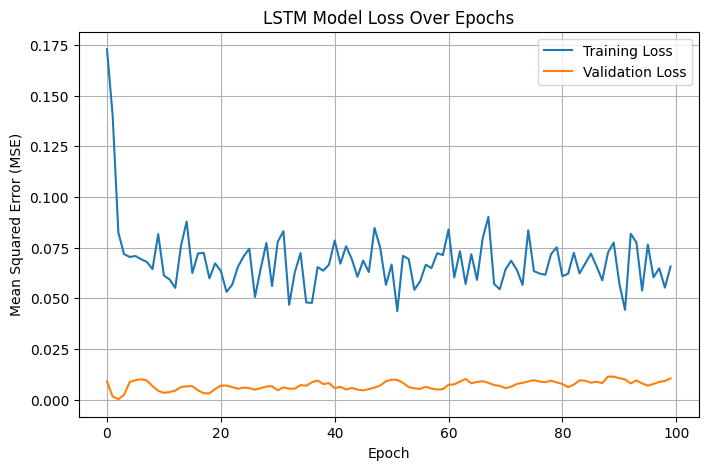

In [112]:
# Plotting loss and validation loss to check 'overfitting'

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [113]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 0.0104
Test Loss: 0.010440217331051826


In [114]:
print("scaled_data shape:", scaled_data.shape)
print("scaled_data[0:3]:", scaled_data[0:3])
print("scaled_data[0:3].shape:", scaled_data[0:3].shape)


scaled_data shape: (8, 1)
scaled_data[0:3]: [[0.82731707]
 [0.66595122]
 [1.        ]]
scaled_data[0:3].shape: (3, 1)


In [115]:
#APRIL

# Get input sequence: Jan, Feb, Mar (assume index 0,1,2)
input_seq = scaled_data[0:3]  # shape: (3, 1)

# Reshape to match LSTM input: (1, time_steps, features)
input_seq = input_seq.reshape((1, 3, 1))

# Predict scaled April Amount
predicted_april_scaled = model.predict(input_seq)
print("Predicted April Amount (scaled):", predicted_april_scaled)

# Inverse transform to get original scale
predicted_april_original = scaler.inverse_transform(predicted_april_scaled)
print("Predicted April Amount (original scale):", predicted_april_original[0, 0])

# Get actual April scaled value (index 3)
actual_april_scaled = scaled_data[3].reshape(1, -1)

# Inverse transform to get actual April Amount
actual_april_original = scaler.inverse_transform(actual_april_scaled)
print("Actual April Amount (original scale):", actual_april_original[0, 0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
Predicted April Amount (scaled): [[0.408886]]
Predicted April Amount (original scale): 35206.785
Actual April Amount (original scale): 45794.0


In [116]:
#may


input_seq = scaled_data[1:4]  # shape: (3, 1)


input_seq = input_seq.reshape((1, 3, 1))


predicted_may_scaled = model.predict(input_seq)
print("Predicted may Amount (scaled):", predicted_may_scaled)

predicted_may_original = scaler.inverse_transform(predicted_may_scaled)
print("Predicted may Amount (original scale):", predicted_may_original[0, 0])


actual_may_scaled = scaled_data[4].reshape(1, -1)

actual_may_original = scaler.inverse_transform(actual_may_scaled)
print("Actual may Amount (original scale):", actual_may_original[0, 0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted may Amount (scaled): [[0.40370476]]
Predicted may Amount (original scale): 35020.91
Actual may Amount (original scale): 20538.0


In [117]:
#june


input_seq = scaled_data[2:5]  # shape: (3, 1)


input_seq = input_seq.reshape((1, 3, 1))


predicted_june_scaled = model.predict(input_seq)
print("Predicted june Amount (scaled):", predicted_june_scaled)


predicted_june_original = scaler.inverse_transform(predicted_june_scaled)
print("Predicted june Amount (original scale):", predicted_june_original[0, 0])


actual_june_scaled = scaled_data[5].reshape(1, -1)

actual_june_original = scaler.inverse_transform(actual_june_scaled)
print("Actual june Amount (original scale):", actual_june_original[0, 0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted june Amount (scaled): [[0.40727258]]
Predicted june Amount (original scale): 35148.906
Actual june Amount (original scale): 36904.0


In [118]:
#july


input_seq = scaled_data[3:6]  # shape: (3, 1)

input_seq = input_seq.reshape((1, 3, 1))


predicted_july_scaled = model.predict(input_seq)
print("Predicted july Amount (scaled):", predicted_july_scaled)


predicted_july_original = scaler.inverse_transform(predicted_july_scaled)
print("Predicted july Amount (original scale):", predicted_july_original[0, 0])


actual_july_scaled = scaled_data[6].reshape(1, -1)

actual_july_original = scaler.inverse_transform(actual_july_scaled)
print("Actual july Amount (original scale):", actual_july_original[0, 0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted july Amount (scaled): [[0.3184786]]
Predicted july Amount (original scale): 31963.42
Actual july Amount (original scale): 32410.0


In [119]:
#august


input_seq = scaled_data[4:7]  # shape: (3, 1)


input_seq = input_seq.reshape((1, 3, 1))


predicted_aug_scaled = model.predict(input_seq)
print("Predicted aug Amount (scaled):", predicted_aug_scaled)


predicted_aug_original = scaler.inverse_transform(predicted_aug_scaled)
print("Predicted aug Amount (original scale):", predicted_aug_original[0, 0])


actual_aug_scaled = scaled_data[7].reshape(1, -1)


actual_aug_original = scaler.inverse_transform(actual_aug_scaled)
print("Actual aug Amount (original scale):", actual_aug_original[0, 0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted aug Amount (scaled): [[0.24715298]]
Predicted aug Amount (original scale): 29404.613
Actual aug Amount (original scale): 25739.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


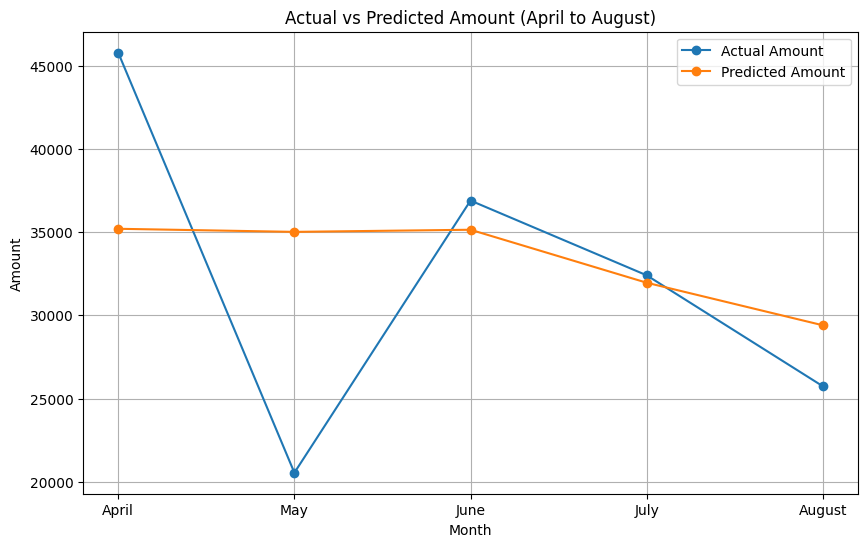

In [120]:
import numpy as np
import matplotlib.pyplot as plt

months = ['April', 'May', 'June', 'July', 'August']
predicted_amounts = []
actual_amounts = []

for i in range(3, 8):  # Index for April (3) to August (7)
    # Take previous 3 months of scaled 'Amount' values
    input_seq = scaled_data[i-3:i].reshape(1, 3, 1)  # (1, 3, 1)

    # Predict scaled Amount
    predicted_scaled = model.predict(input_seq)

    # Inverse transform predicted Amount to original scale
    predicted_amount = scaler.inverse_transform(predicted_scaled)[0, 0]
    predicted_amounts.append(predicted_amount)

    # Inverse transform actual scaled Amount
    actual_scaled = scaled_data[i].reshape(1, -1)
    actual_amount = scaler.inverse_transform(actual_scaled)[0, 0]
    actual_amounts.append(actual_amount)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(months, actual_amounts, marker='o', label='Actual Amount')
plt.plot(months, predicted_amounts, marker='o', label='Predicted Amount')
plt.title('Actual vs Predicted Amount (April to August)')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


In [121]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert lists to numpy arrays
actual = np.array(actual_amounts)
predicted = np.array(predicted_amounts)

# Custom MAPE implementation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # To avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, predicted)

# RMSE as a percentage of the mean of actual values
mean_actual = np.mean(actual)
rmse_percentage = (rmse / (mean_actual + 1e-10)) * 100  # epsilon added to avoid div by zero

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"RMSE as Percentage of Mean Actual: {rmse_percentage:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Optional: Regression accuracy (only if values are safely > 0)
if np.all(actual > 1):  # Just a safeguard
    print(f"Approximate Regression Accuracy: {100 - mape:.2f}%")
else:
    print("Warning: Some actual values are very small; avoid using MAPE-based accuracy.")


Mean Absolute Error (MAE): 6187.48
Root Mean Squared Error (RMSE): 8228.73
RMSE as Percentage of Mean Actual: 25.49%
Mean Absolute Percentage Error (MAPE): 22.80%
Approximate Regression Accuracy: 77.20%


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Function to create input sequences and targets
def create_sequence(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Function to compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Store results
product_names = []
mape_values = []
actual_dict = {}
predicted_dict = {}

# Get unique products
products = grouped_month['Product'].unique()

for product in products:
    product_df = grouped_month[grouped_month['Product'] == product].sort_values(by=['Year', 'Month'])

    # Add date
    product_df['Date'] = pd.to_datetime(product_df[['Year', 'Month']].assign(DAY=1))
    product_df.set_index('Date', inplace=True)

    # Skip if less than 6 months of data
    if len(product_df) < 6:
        continue

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(product_df[['Amount']])

    X, y = create_sequence(scaled_data, seq_length=3)


    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0, validation_data=(X_test, y_test))

    # Predict last N months (e.g., April to August)
    predicted_amounts = []
    actual_amounts = []
    for i in range(3, len(scaled_data)):
        input_seq = scaled_data[i-3:i].reshape(1, 3, 1)
        pred_scaled = model.predict(input_seq, verbose=0)

        pred_original = scaler.inverse_transform(pred_scaled)[0, 0]
        predicted_amounts.append(pred_original)

        actual_scaled = scaled_data[i].reshape(1, -1)
        actual_original = scaler.inverse_transform(actual_scaled)[0, 0]
        actual_amounts.append(actual_original)

    if len(predicted_amounts) == 0:
        continue

    # MAPE
    mape = mean_absolute_percentage_error(actual_amounts, predicted_amounts)
    mape_values.append(mape)
    product_names.append(product)

    # Store actual vs predicted for plotting
    actual_dict[product] = np.mean(actual_amounts)
    predicted_dict[product] = np.mean(predicted_amounts)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

In [123]:
# Create DataFrame for predicted vs actual
comparison_df = pd.DataFrame({
    'Product': product_names,
    'Actual_Mean_Amount': [actual_dict[p] for p in product_names],
    'Predicted_Mean_Amount': [predicted_dict[p] for p in product_names]
})

# Create DataFrame for MAPE values
mape_df = pd.DataFrame({
    'Product': product_names,
    'MAPE': mape_values
})

# Display both tables
print("Predicted vs Actual Mean Amounts:")
print(comparison_df)

print("\nMAPE Values:")
print(mape_df)


Predicted vs Actual Mean Amounts:
                 Product  Actual_Mean_Amount  Predicted_Mean_Amount
0         50% Dark Bites             41780.2           39118.050781
1         70% Dark Bites             19388.6           23284.964844
2          85% Dark Bars             51055.2           40689.242188
3        99% Dark & Pure             38613.4           33534.339844
4            After Nines             33035.8           29381.005859
5           Almond Choco             38043.6           40000.839844
6    Baker's Choco Chips             29054.2           20961.417969
7   Caramel Stuffed Bars             33706.4           32918.242188
8   Choco Coated Almonds             31778.6           25388.072266
9          Drinking Coco             30301.6           35504.855469
10               Eclairs             32277.0           33326.531250
11      Fruit & Nut Bars             35723.8           40972.230469
12    Manuka Honey Choco             34580.0           37603.343750
13            

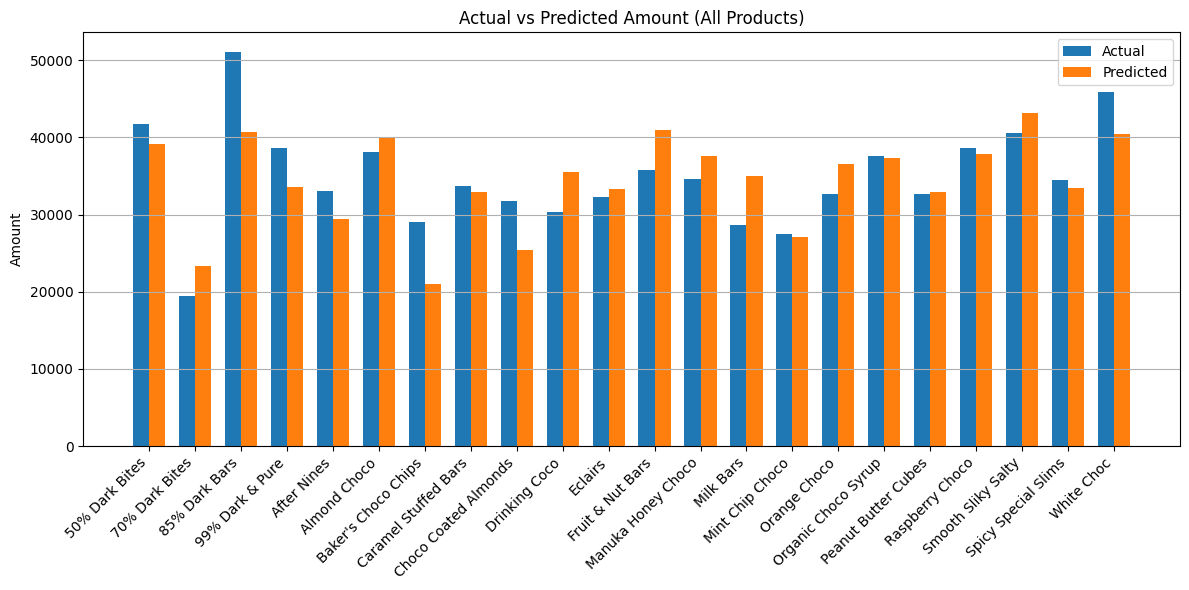

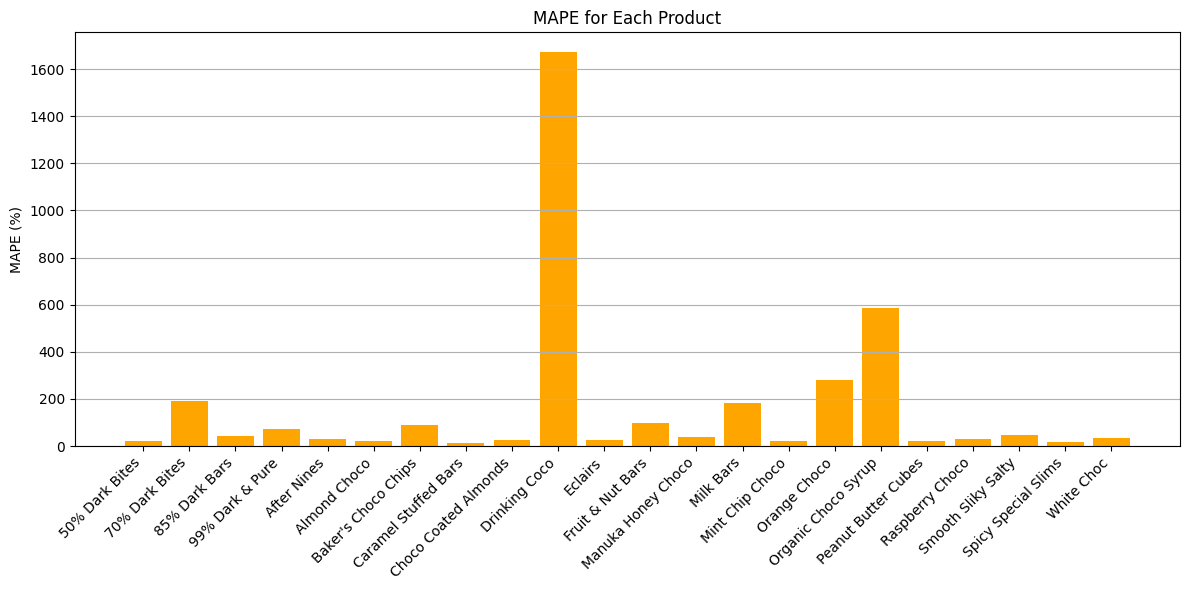

In [124]:
# --------------------------------------------
# PLOT: Actual vs Predicted Amounts (Bar Graph)
# --------------------------------------------
x = np.arange(len(product_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, [actual_dict[p] for p in product_names], width, label='Actual')
bar2 = ax.bar(x + width/2, [predicted_dict[p] for p in product_names], width, label='Predicted')

ax.set_ylabel('Amount')
ax.set_title('Actual vs Predicted Amount (All Products)')
ax.set_xticks(x)
ax.set_xticklabels(product_names, rotation=45, ha='right')  # Align labels to the right for clarity
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


# ----------------------
# PLOT: MAPE Bar Chart
# ----------------------
plt.figure(figsize=(12, 6))
bars = plt.bar(product_names, mape_values, color='orange')

plt.ylabel('MAPE (%)')
plt.title('MAPE for Each Product')
plt.xticks(rotation=45, ha='right')  # Align x-axis labels
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()
